In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
mousenums = ['230', '355', '362', '673', '674', '816', '825']

In [3]:
timeBefore = 20
timeAfter = 40
enterSide = np.zeros((0, timeBefore + timeAfter))
exitSide = np.zeros((0, timeBefore + timeAfter))
cta = []
for mouse in ['230', '355', '362', '673', '674', '816', '825']:
    track1, neur1, behav1 = getdicts(foldnames, mouse, 'epm')
    track2, neur2, behav2 = getdicts(foldnames, mouse, 'rat1')
    calc1, calc2 = getcalcs(foldnames, mouse, 'epm', 'rat1')
    calc1 = zscore(calc1)
    calc2 = zscore(calc2)
    
    mpos2 = track2['mouse_positionMS']
    mpos2[:, 0] = minmaxscale(mpos2[:, 0], vmin=0, vmax=1)
    mpos2[:, 1] = minmaxscale(mpos2[:, 1], vmin=0, vmax=1)
    
    isNear = (mpos2[:, 0] > 0.2)
    toside = np.zeros(mpos2.shape[0])
    toside[1:] = np.diff(isNear.astype('int'))
    toside[0:timeBefore] = 0
    toside[-timeAfter:] = 0
    
    enterSideInd = np.nonzero(toside == -1)[0]
    exitSideInd = np.nonzero(toside == 1)[0]
    
    numCells = calc2.shape[1]
    for cell in range(numCells):
        traces = np.zeros((enterSideInd.size, timeBefore+timeAfter))
        for k in range(enterSideInd.size):
            traces[k] = calc2[enterSideInd[k] - timeBefore: enterSideInd[k] + timeAfter, cell]
        tracemean = np.mean(traces, axis = 0).reshape((1, timeBefore+timeAfter))
        enterSide = np.vstack((enterSide, tracemean))
        
        traces = np.zeros((exitSideInd.size, timeBefore+timeAfter))
        for k in range(exitSideInd.size):
            traces[k] = calc2[exitSideInd[k] - timeBefore: exitSideInd[k] + timeAfter, cell]
        tracemean = np.mean(traces, axis = 0).reshape((1, timeBefore+timeAfter))
        exitSide = np.vstack((exitSide, tracemean))
        cta.append(celltypebehav(calc1[:, cell], behav1))
cta = np.array(cta)

In [4]:
for i, typ in enumerate(['o', 'n', 'c']):
    print(np.sum(cta == typ))

64
166
87


RanksumsResult(statistic=3.3550339544858825, pvalue=0.0007935524364543661)


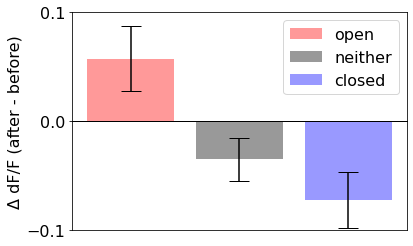

In [5]:
colors = ['r', 'k', 'b']
diffs = []
for i, typ in enumerate(['o', 'n', 'c']):
    diff = np.mean(exitSide[cta == typ][:, 20:39], axis=1) - np.mean(exitSide[cta == typ][:, 1:20], axis=1)
    diffs.append(diff)
    plt.bar(i, np.mean(diff), color=colors[i], alpha=0.4)
print(ranksums(diffs[0], diffs[2]))
plt.legend(['open', 'neither', 'closed'])
for i, typ in enumerate(['o', 'n', 'c']):
    diff = np.mean(exitSide[cta == typ][:, 20:39], axis=1) - np.mean(exitSide[cta == typ][:, 1:20], axis=1)
    plt.errorbar(i, np.mean(diff), sem(diff), fmt='k_', ms=0, capsize=10)
plt.plot(0, 0, 'k_', ms=2000)
plt.ylim(-0.1, 0.1)
plt.yticks([-0.1, 0, 0.1])
plt.xticks([])

plt.ylabel('Δ dF/F (after - before)')
plt.savefig('./elife_figs/3H.svg')

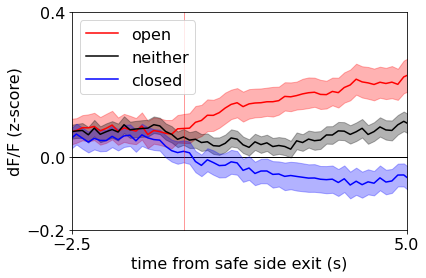

In [6]:
t = np.arange(-20, 40)/7.5
for i, typ in enumerate(['o', 'n', 'c']):
    tracemu = np.mean(exitSide[cta==typ], axis=0)
    tracesem = sem(exitSide[cta==typ], axis=0)
    plt.fill_between(t, tracemu-tracesem, tracemu+tracesem, color=colors[i], alpha=0.3, zorder=-1)
    plt.plot(t, tracemu, color=colors[i])
plt.legend(['open', 'neither', 'closed'])
plt.ylim(-0.2, 0.4)
plt.yticks([-0.2, 0, 0.4])
plt.xlim(-2.5, 5)
plt.xticks([-2.5, 5])
plt.xlabel('time from safe side exit (s)')
plt.ylabel('dF/F (z-score)')
plt.plot(0, 0, 'r|', ms=2000, alpha=0.4)
plt.plot(0, 0, 'k_', ms=2000, zorder=-2)

plt.savefig('./elife_figs/3G.svg')